In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpyro as npy
import numpyro.distributions as dist
import pandas as pd
from jax import random
import geopandas as gpd
import genomicsurveillance as gs ## misc branch on github

assert npy.__version__.startswith("0.8.0")
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'axes.grid': True,
                     'grid.linestyle': ':',
                     'axes.spines.bottom': False,
          'axes.spines.left': False,
          'axes.spines.right': False,
          'axes.spines.top': False})

/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/jax/experimental/optimizers.py:30: FutureWarning: jax.experimental.optimizers is deprecated, import jax.example_libraries.optimizers instead
  FutureWarning)
/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/jax/experimental/stax.py:30: FutureWarning: jax.experimental.stax is deprecated, import jax.example_libraries.stax instead
  FutureWarning)


In [2]:
#plz = gpd.read_file("https://opendata.arcgis.com/datasets/5b203df4357844c8a6715d7d411a8341_0.geojson")
plz = gpd.read_file("data/5b203df4357844c8a6715d7d411a8341_0.geojson")
bland = plz.set_index("plz")['bundesland']

In [3]:
df = pd.read_csv(
    'data/meta_lineages.csv',
    index_col=0,
    parse_dates=[1,3],
    infer_datetime_format=True,
    cache_dates=True,
    dtype = {'SEQ_REASON': 'category',
             'SENDING_LAB_PC': 'category',
             'SEQUENCING_LAB_PC': 'category',
             'lineage': 'category',
             'scorpio_call': 'category'
             }
)
df.rename(columns={
    'DATE_DRAW': 'date',
    'PROCESSING_DATE': 'processing_date',
    'SEQ_REASON': 'reason',
    'SENDING_LAB_PC': 'sending_pc',
    'SEQUENCING_LAB_PC': 'sequencing_pc',
    'lineage': 'lineage',
    'scorpio_call': 'scorpio'
    },
    inplace=True
)

In [4]:
df

date reason  \
IMS_ID                                                                 
IMS-10294-CVDP-00001                               2021-01-14      X   
IMS-10025-CVDP-00001                               2021-01-17      N   
IMS-10025-CVDP-00002                               2021-01-17      N   
IMS-10025-CVDP-00003                               2021-01-17      N   
IMS-10025-CVDP-00004                               2021-01-17      N   
...                                                       ...    ...   
IMS-10122-CVDP-8730EDCF-2415-4C0D-A67C-D354AA60... 2022-01-19      X   
IMS-10122-CVDP-4617E5E9-EDD8-47CD-80EF-0230BF60... 2022-01-22      X   
IMS-10122-CVDP-D771877C-ACCB-4823-85A3-AE3AAEE8... 2022-01-12      X   
IMS-10122-CVDP-F2FA3975-BF13-4F91-896D-A8D5918A... 2022-01-17      X   
IMS-10122-CVDP-30C32133-805E-4CD7-81B2-BC91BD72... 2022-01-20      X   

                                                   processing_date sending_pc  \
IMS_ID                                                                          
IMS-10294-CVDP-00001                                    2021-01-25      40225   
IMS-10025-CVDP-00001                                    2021-01-26      10409   
IMS-10025-CVDP-00002                                    2021-01-26      10409   
IMS-10025-CVDP-00003                                    2021-01-26      10409   
IMS-10025-CVDP-00004                                    2021-01-26      10409   
...                                                            ...        ...   
IMS-10122-CVDP-8730EDCF-2415-4C0D-A67C-D354AA60...      2022-01-30      76131   
IMS-10122-CVDP-4617E5E9-EDD8-47CD-80EF-0230BF60...      2022-01-30      03050   
IMS-10122-CVDP-D771877C-ACCB-4823-85A3-AE3AAEE8...      2022-01-30      88212   
IMS-10122-CVDP-F2FA3975-BF13-4F91-896D-A8D5918A...      2022-01-30      19061   
IMS-10122-CVDP-30C32133-805E-4CD7-81B2-BC91BD72...      2022-01-30      76131   

                                                   sequencing_pc     lineage  \
IMS_ID                                                                         
IMS-10294-CVDP-00001                                       40225   B.1.1.297   
IMS-10025-CVDP-00001                                       10409     B.1.389   
IMS-10025-CVDP-00002                                       10409     B.1.258   
IMS-10025-CVDP-00003                                       10409  B.1.177.86   
IMS-10025-CVDP-00004                                       10409     B.1.389   
...                                                          ...         ...   
IMS-10122-CVDP-8730EDCF-2415-4C0D-A67C-D354AA60...         76131      BA.1.1   
IMS-10122-CVDP-4617E5E9-EDD8-47CD-80EF-0230BF60...         76131        BA.1   
IMS-10122-CVDP-D771877C-ACCB-4823-85A3-AE3AAEE8...         76131      BA.1.1   
IMS-10122-CVDP-F2FA3975-BF13-4F91-896D-A8D5918A...         76131      BA.1.1   
IMS-10122-CVDP-30C32133-805E-4CD7-81B2-BC91BD72...         76131        BA.1   

                                                                scorpio  
IMS_ID                                                                   
IMS-10294-CVDP-00001                                                NaN  
IMS-10025-CVDP-00001                                                NaN  
IMS-10025-CVDP-00002                                                NaN  
IMS-10025-CVDP-00003                                                NaN  
IMS-10025-CVDP-00004                                                NaN  
...                                                                 ...  
IMS-10122-CVDP-8730EDCF-2415-4C0D-A67C-D354AA60...  Omicron (BA.1-like)  
IMS-10122-CVDP-4617E5E9-EDD8-47CD-80EF-0230BF60...  Omicron (BA.1-like)  
IMS-10122-CVDP-D771877C-ACCB-4823-85A3-AE3AAEE8...  Omicron (BA.1-like)  
IMS-10122-CVDP-F2FA3975-BF13-4F91-896D-A8D5918A...  Omicron (BA.1-like)  
IMS-10122-CVDP-30C32133-805E-4CD7-81B2-BC91BD72...  Omicron (BA.1-like)  

[517439 rows x 7 columns]

In [5]:
df = df.merge(bland, left_on='sending_pc', right_index=True)#.dropna()


In [37]:
d = df.loc[df.date >= "2021-11-01",:]
d = d[d.reason.isin(['N'])]
d.lineage = d.lineage.cat.add_categories(['Other'])
d.loc[~d.lineage.isin(['BA.1','BA.1.1','BA.2','BA.3','B.1.1.529']),"lineage"] = "Other"
genomes = pd.crosstab(index=[d.bundesland, d.date], columns=d.lineage.cat.remove_unused_categories(), dropna=False).fillna(0)
#genomes.loc["Baden-Württemberg"]
genomes

lineage                       BA.1.1  BA.1  BA.2  BA.3  Other
bundesland        date                                       
Baden-Württemberg 2021-11-01       0     0     0     0     35
                  2021-11-02       0     0     0     0    197
                  2021-11-03       0     0     0     0     94
                  2021-11-04       0     0     0     0    230
                  2021-11-05       0     0     0     0     99
...                              ...   ...   ...   ...    ...
Thüringen         2022-01-22       1     1     0     0      3
                  2022-01-23       0     0     0     0      0
                  2022-01-24       0     0     0     0      0
                  2022-01-25       0     0     0     0      0
                  2022-01-26       0     0     0     0      0

[1392 rows x 5 columns]

In [38]:
G = genomes.values.reshape([len(genomes.index.levels[0]), len(genomes.index.levels[1]), -1])

In [39]:
cases_raw = pd.read_csv("https://media.githubusercontent.com/media/robert-koch-institut/SARS-CoV-2_Infektionen_in_Deutschland/master/Aktuell_Deutschland_SarsCov2_Infektionen.csv",  index_col=[0,1,2,4], parse_dates=True)

In [40]:
cases_raw

Meldedatum  \
IdLandkreis Altersgruppe Geschlecht Refdatum                 
1001        A15-A34      M          2020-01-19  2020-10-28   
                                    2020-03-13  2020-03-21   
                                    2020-03-13  2020-03-19   
                                    2020-03-16  2020-03-19   
            A35-A59      M          2020-03-16  2020-03-14   
...                                                    ...   
16077       A35-A59      W          2022-01-29  2022-01-29   
            A60-A79      W          2022-01-29  2022-01-29   
            A15-A34      W          2022-01-29  2022-01-29   
                                    2022-01-30  2022-01-30   
            A05-A14      W          2022-01-30  2022-01-30   

                                                IstErkrankungsbeginn  \
IdLandkreis Altersgruppe Geschlecht Refdatum                           
1001        A15-A34      M          2020-01-19                     1   
                                    2020-03-13                     1   
                                    2020-03-13                     1   
                                    2020-03-16                     1   
            A35-A59      M          2020-03-16                     1   
...                                                              ...   
16077       A35-A59      W          2022-01-29                     0   
            A60-A79      W          2022-01-29                     0   
            A15-A34      W          2022-01-29                     0   
                                    2022-01-30                     0   
            A05-A14      W          2022-01-30                     0   

                                                NeuerFall  NeuerTodesfall  \
IdLandkreis Altersgruppe Geschlecht Refdatum                                
1001        A15-A34      M          2020-01-19          0              -9   
                                    2020-03-13          0              -9   
                                    2020-03-13          0              -9   
                                    2020-03-16          0              -9   
            A35-A59      M          2020-03-16          0              -9   
...                                                   ...             ...   
16077       A35-A59      W          2022-01-29          0              -9   
            A60-A79      W          2022-01-29          0              -9   
            A15-A34      W          2022-01-29          1              -9   
                                    2022-01-30          1              -9   
            A05-A14      W          2022-01-30          1              -9   

                                                NeuGenesen  AnzahlFall  \
IdLandkreis Altersgruppe Geschlecht Refdatum                             
1001        A15-A34      M          2020-01-19           0           1   
                                    2020-03-13           0           1   
                                    2020-03-13           0           1   
                                    2020-03-16           0           1   
            A35-A59      M          2020-03-16           0           1   
...                                                    ...         ...   
16077       A35-A59      W          2022-01-29          -9           6   
            A60-A79      W          2022-01-29          -9           3   
            A15-A34      W          2022-01-29          -9           1   
                                    2022-01-30          -9           2   
            A05-A14      W          2022-01-30          -9           1   

                                                AnzahlTodesfall  AnzahlGenesen  
IdLandkreis Altersgruppe Geschlecht Refdatum                                    
1001        A15-A34      M          2020-01-19                0              1  
                                    2020-03-13                0              1  
               

In [41]:
f = cases_raw.reset_index(level=3)[['Refdatum','Meldedatum','AnzahlFall'] ].reset_index()
f['Delta'] = np.clip(pd.to_datetime(f['Meldedatum']) - f['Refdatum'], np.timedelta64(0,"D"), np.timedelta64(10,"D"))
f['bundesland'] = (f.IdLandkreis/1000).astype("int")

f= f.set_index(["bundesland","IdLandkreis","Altersgruppe","Geschlecht","Refdatum","Delta"]).sum(level=[0,4,5]).sort_index()
f = f.unstack(level=2)["AnzahlFall"].sort_index().loc[:,"2021-12-27":,:]#.loc[:,"2021-11-01":]
f /= f.sum(1).values[:,np.newaxis]

<AxesSubplot:xlabel='bundesland,Refdatum'>

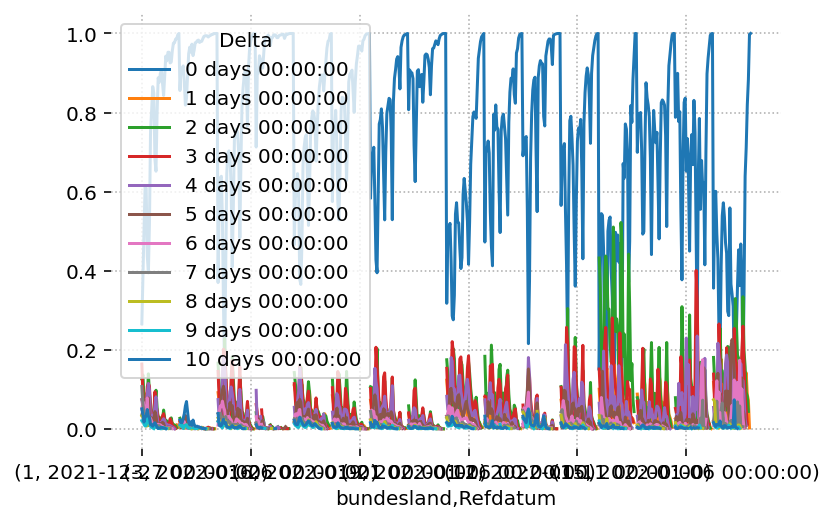

In [42]:
f.plot()

In [43]:
f['weekday'] = f.reset_index()['Refdatum'].dt.strftime("%a").values

In [44]:
f = f.reset_index().set_index(["bundesland","Refdatum","weekday"]).cumsum(1).mean(level=[0,2]).fillna(1)

In [45]:
f.loc[1]

Delta    0 days 00:00:00  1 days 00:00:00  2 days 00:00:00  3 days 00:00:00  \
weekday                                                                       
Mon             0.687409         0.726248         0.787895         0.857834   
Tue             0.789928         0.817488         0.868423         0.904641   
Wed             0.818359         0.853237         0.888084         0.908850   
Thu             0.863277         0.883388         0.903459         0.920229   
Fri             0.860952         0.878585         0.897757         0.898674   
Sat             0.782923         0.799320         0.796702         0.861586   
Sun             0.763423         0.731666         0.809671         0.867464   

Delta    4 days 00:00:00  5 days 00:00:00  6 days 00:00:00  7 days 00:00:00  \
weekday                                                                       
Mon             0.903502         0.919567         0.933532         0.953967   
Tue             0.922731         0.921732         0.949172         0.968962   
Wed             0.929205         0.941535         0.962622         0.977611   
Thu             0.926943         0.951583         0.968272         0.979083   
Fri             0.929535         0.953429         0.971296         0.982795   
Sat             0.905352         0.940674         0.965326         0.970160   
Sun             0.924351         0.956428         0.964685         0.958611   

Delta    8 days 00:00:00  9 days 00:00:00  10 days 00:00:00  
weekday                                                      
Mon             0.969042         0.978824               1.0  
Tue             0.980835         0.988120               1.0  
Wed             0.988165         0.992706               1.0  
Thu             0.988193         0.983390               1.0  
Fri             0.980467         0.983502               1.0  
Sat             0.964190         0.977527               1.0  
Sun             0.973040         0.985181               1.0

In [46]:
reporting_lag = np.array([f.loc[:,d.strftime("%a"),:].iloc[:,(cases_raw.index.levels[3][-1]-d).days] for d in cases_raw.index.levels[3][-9:]]).T

In [47]:
s="""01  Schleswig-Holstein
02  Hamburg
03  Niedersachsen
04  Bremen
05  Nordrhein-Westfalen
06  Hessen
07  Rheinland-Pfalz
08  Baden-Württemberg
09  Bayern
10  Saarland
11  Berlin
12  Brandenburg
13  Mecklenburg-Vorpommern
14  Sachsen
15  Sachsen-Anhalt
16  Thüringen"""
b={int(x.split()[0]): x.split()[1] for x in s.split("\n")}

In [48]:
current_lag = pd.DataFrame(reporting_lag, index=np.arange(1,17)).rename(index=b).sort_index()
current_lag

0         1         2         3         4  \
Baden-Württemberg       0.996320  0.991597  0.988305  0.990427  0.982742   
Bayern                  0.982955  0.977502  0.954850  0.943691  0.907506   
Berlin                  0.953446  0.929565  0.927126  0.921600  0.890010   
Brandenburg             0.988588  0.976940  0.975145  0.953066  0.926641   
Bremen                  1.000000  1.000000  0.987986  0.992656  0.946015   
Hamburg                 0.967270  0.962358  0.961625  0.979228  0.977867   
Hessen                  0.989386  0.988588  0.979908  0.979574  0.966152   
Mecklenburg-Vorpommern  0.994018  0.991101  0.967439  0.973426  0.943826   
Niedersachsen           0.986350  0.976258  0.950273  0.949346  0.921448   
Nordrhein-Westfalen     0.976276  0.962609  0.948416  0.945350  0.923231   
Rheinland-Pfalz         0.987564  0.977637  0.961306  0.958577  0.936627   
Saarland                0.995890  0.998590  0.958372  0.976149  0.968566   
Sachsen                 0.994796  0.990197  0.983444  0.983564  0.970510   
Sachsen-Anhalt          0.987147  0.995043  0.983949  0.987027  0.944608   
Schleswig-Holstein      0.964190  0.958611  0.933532  0.921732  0.929205   
Thüringen               0.966802  0.989700  0.950010  0.898696  0.872735   

                               5         6         7         8  
Baden-Württemberg       0.959536  0.952567  0.883184  0.853638  
Bayern                  0.839766  0.738831  0.632672  0.576599  
Berlin                  0.919017  0.846055  0.633789  0.722220  
Brandenburg             0.880178  0.803829  0.685480  0.543369  
Bremen                  0.975890  0.996597  0.958023  0.973233  
Hamburg                 0.967703  0.961655  0.939596  0.953381  
Hessen                  0.950684  0.906294  0.836515  0.782600  
Mecklenburg-Vorpommern  0.884184  0.759356  0.433160  0.366082  
Niedersachsen           0.884856  0.812185  0.709538  0.563373  
Nordrhein-Westfalen     0.899219  0.850983  0.755564  0.682426  
Rheinland-Pfalz         0.909023  0.850623  0.756275  0.662381  
Saarland                0.945082  0.883846  0.806199  0.711798  
Sachsen                 0.923936  0.827389  0.652591  0.586260  
Sachsen-Anhalt          0.850176  0.812444  0.668384  0.495824  
Schleswig-Holstein      0.920229  0.897757  0.799320  0.763423  
Thüringen               0.729509  0.619036  0.460032  0.361460

In [49]:
cases = cases_raw['AnzahlFall'].sum(level=(0,3)).sort_index()

In [104]:
cases_land = cases.reset_index()
cases_land['bundesland'] = (cases_land.IdLandkreis/1000).astype("int")
cases_land = cases_land.set_index(['bundesland', 'IdLandkreis','Refdatum']).sum(level=(0,2)).sort_index()
cases_land = cases_land.rename(index=b).sort_index()
cases_land = cases_land.loc[:,"2021-11-01":,:].unstack()["AnzahlFall"]#.iloc[:,:-1]
#cases_land.iloc[:,-9:] = (cases_land.iloc[:,-9:] / reporting_lag).astype("int32")
cases_land

Refdatum                2021-11-01  2021-11-02  2021-11-03  2021-11-04  \
bundesland                                                               
Baden-Württemberg             2141        2958        4430        4622   
Bayern                        5935        7042        9171        8923   
Berlin                        1262        1309        1474        1430   
Brandenburg                    808         977        1071        1061   
Bremen                          79          89          69          62   
Hamburg                        298         435         535         510   
Hessen                        1188        1592        1716        1582   
Mecklenburg-Vorpommern         418         428         405         317   
Niedersachsen                 1185        1453        1674        1370   
Nordrhein-Westfalen           2510        3361        4298        4372   
Rheinland-Pfalz                642         990        1127        1079   
Saarland                       126         123         203         230   
Sachsen                       2830        3665        3466        3296   
Sachsen-Anhalt                 647         856         721         738   
Schleswig-Holstein             337         390         366         354   
Thüringen                     1763        1447        1480        1566   

Refdatum                2021-11-05  2021-11-06  2021-11-07  2021-11-08  \
bundesland                                                               
Baden-Württemberg             5071        4131        2276        4410   
Bayern                        9217        8778        7204        9292   
Berlin                        1454         905         694        2197   
Brandenburg                   1184        1118         971        1254   
Bremen                          55          55          31          60   
Hamburg                        539         427         372         489   
Hessen                        1688        1321        1091        1469   
Mecklenburg-Vorpommern         544         505         313         528   
Niedersachsen                 1398        1165         843        1621   
Nordrhein-Westfalen           4070        3719        2853        4319   
Rheinland-Pfalz               1027         808         764        1082   
Saarland                       185         214         155         209   
Sachsen                       3452        3180        2644        4421   
Sachsen-Anhalt                 729         658         899         670   
Schleswig-Holstein             436         382         298         448   
Thüringen                     1429        1752        1185        1855   

Refdatum                2021-11-09  2021-11-10  ...  2022-01-21  2022-01-22  \
bundesland                                      ...                           
Baden-Württemberg             7139        7755  ...       18638       12437   
Bayern                       11208       12109  ...       19723       17370   
Berlin                        1899        2326  ...       11660        3084   
Brandenburg                   1492        1680  ...        5405        2951   
Bremen                         143          95  ...        2124         643   
Hamburg                        521         596  ...        6043        3476   
Hessen                        1791        2065  ...       10664        7513   
Mecklenburg-Vorpommern         596         466  ...        2071        2073   
Niedersachsen                 1758        2164  ...       11783        8165   
Nordrhein-Westfalen           5241        5401  ...       32160       23808   
Rheinland-Pfalz               1139        1329  ...        5537        3298   
Saarland                       274         301  ...        1325        1318   
Sachsen                       5777        5960  ...        2907        2146   
Sachsen-Anhalt                1019        1178  ...        2066        1274   
Schleswig-Holstein             486         542  ...        4725       

In [105]:
cases_land.sum(0)

Refdatum
2021-11-01     22169
2021-11-02     27115
2021-11-03     32206
2021-11-04     31512
2021-11-05     32478
               ...  
2022-01-26    170790
2022-01-27    172348
2022-01-28    151702
2022-01-29     86834
2022-01-30     41898
Length: 91, dtype: int64

In [106]:
clip = 1
cases_land.iloc[:,-9:] = (cases_land.iloc[:,-9:] / current_lag.values)#.astype("int32")
cases_land.loc["Hamburg"].iloc[-2:] = np.nan
cases_land = cases_land.iloc[:,:cases_land.shape[1]-clip]
cases_land

/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Refdatum                2021-11-01  2021-11-02  2021-11-03  2021-11-04  \
bundesland                                                               
Baden-Württemberg             2141        2958        4430        4622   
Bayern                        5935        7042        9171        8923   
Berlin                        1262        1309        1474        1430   
Brandenburg                    808         977        1071        1061   
Bremen                          79          89          69          62   
Hamburg                        298         435         535         510   
Hessen                        1188        1592        1716        1582   
Mecklenburg-Vorpommern         418         428         405         317   
Niedersachsen                 1185        1453        1674        1370   
Nordrhein-Westfalen           2510        3361        4298        4372   
Rheinland-Pfalz                642         990        1127        1079   
Saarland                       126         123         203         230   
Sachsen                       2830        3665        3466        3296   
Sachsen-Anhalt                 647         856         721         738   
Schleswig-Holstein             337         390         366         354   
Thüringen                     1763        1447        1480        1566   

Refdatum                2021-11-05  2021-11-06  2021-11-07  2021-11-08  \
bundesland                                                               
Baden-Württemberg             5071        4131        2276        4410   
Bayern                        9217        8778        7204        9292   
Berlin                        1454         905         694        2197   
Brandenburg                   1184        1118         971        1254   
Bremen                          55          55          31          60   
Hamburg                        539         427         372         489   
Hessen                        1688        1321        1091        1469   
Mecklenburg-Vorpommern         544         505         313         528   
Niedersachsen                 1398        1165         843        1621   
Nordrhein-Westfalen           4070        3719        2853        4319   
Rheinland-Pfalz               1027         808         764        1082   
Saarland                       185         214         155         209   
Sachsen                       3452        3180        2644        4421   
Sachsen-Anhalt                 729         658         899         670   
Schleswig-Holstein             436         382         298         448   
Thüringen                     1429        1752        1185        1855   

Refdatum                2021-11-09  2021-11-10  ...  2022-01-20  2022-01-21  \
bundesland                                      ...                           
Baden-Württemberg             7139        7755  ...       17449       18638   
Bayern                       11208       12109  ...       21069       19723   
Berlin                        1899        2326  ...       12447       11660   
Brandenburg                   1492        1680  ...        6020        5405   
Bremen                         143          95  ...        1058        2124   
Hamburg                        521         596  ...        6727        6043   
Hessen                        1791        2065  ...       11890       10664   
Mecklenburg-Vorpommern         596         466  ...        1674        2071   
Niedersachsen                 1758        2164  ...       10778       11783   
Nordrhein-Westfalen           5241        5401  ...       28386       32160   
Rheinland-Pfalz               1139        1329  ...        5790        5537   
Saarland                       274         301  ...        1769        1325   
Sachsen                       5777        5960  ...        2883        2907   
Sachsen-Anhalt                1019        1178  ...        1880        2066   
Schleswig-Holstein             486         542  ...        4872       

In [70]:
C = cases_land.values

In [71]:
capita = pd.read_csv("data/12411-0010.csv", index_col=0)["Population"]
capita

Baden-Württemberg         11103043
Bayern                    13140183
Berlin                     3664088
Brandenburg                2531071
Bremen                      680130
Hamburg                    1852478
Hessen                     6293154
Mecklenburg-Vorpommern     1610774
Niedersachsen              8003421
Nordrhein-Westfalen       17925570
Rheinland-Pfalz            4098391
Saarland                    983991
Sachsen                    4056941
Sachsen-Anhalt             2180684
Schleswig-Holstein         2910875
Thüringen                  2120237
Name: Population, dtype: int64

In [83]:
from genomicsurveillance.misc import fused_basis
B0 = fused_basis(C.shape[1]+clip, inc=10, fuse=5) ## cubic spline basis every 10d, last 4 linearly fused to avoid wriggles 

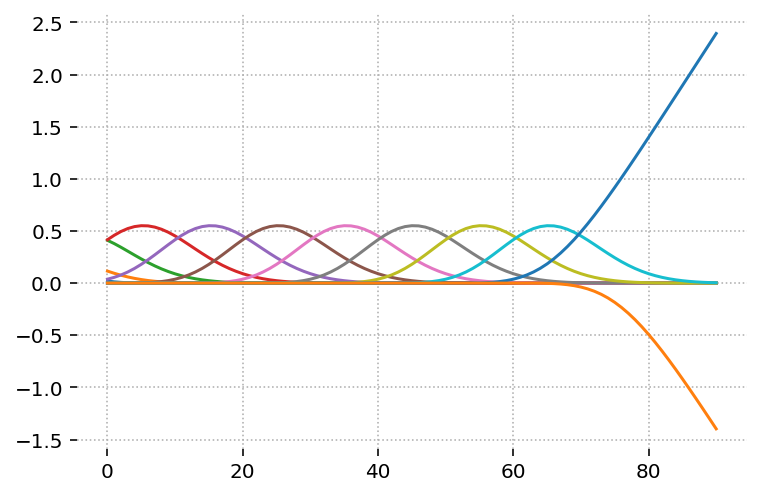

In [87]:
for i in range(B0.shape[-1]):
    plt.plot(B0[0,:,i])

In [88]:
seq_index = np.array([list(cases_land.columns).index(i) for i in genomes.index.levels[1]])

In [89]:
from genomicsurveillance.misc import MultiLineageTimeShift, plot_lad, plot_growth_rates

In [90]:
from numpyro.infer import Trace_ELBO

In [91]:
GG = np.concatenate([G, G.sum(0, keepdims=True)], axis=0) # Add Germany as a whole
CC = np.concatenate([C, C.sum(0, keepdims=True)], axis=0)    

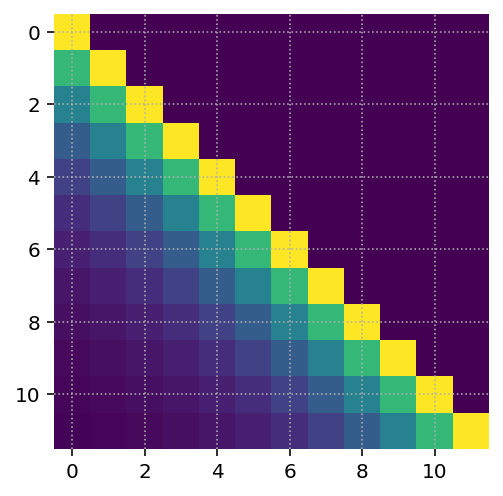

In [92]:
arma2 = np.eye(B0.shape[-1]) ## Prior covariance matrix for the splines to avoid too many wrinkles
for j in range(arma2.shape[0]-1):
    arma2[j+1,j] = -0.667
arma2 = np.linalg.inv(arma2)
plt.imshow(arma2)

In [93]:
model = MultiLineageTimeShift(
    CC,
    GG,    
    seq_index,
    np.concatenate([capita.values, capita.values.sum().reshape(1)]),
    #auto_correlation=0.5,
    #linearize=True,
    arma = arma2,
    b_scale=0.01,
    b0_scale=0.3,
    beta_scale= np.append(10.,np.repeat(10., B0.shape[2]-1)),# np.concatenate([np.repeat(1., knots.num_long_basis), np.repeat(.1, knots.num_short_basis)]),
    tau=4.6,
    basis=B0, #knots.basis,
    shift=7,  
    alpha0=.01,
    alpha1=100., 
    week=True,
    #model_kwargs={'handler':'SVI', 'loss':Trace_ELBO(num_particles=5), 'num_epochs':10000, 'lr':0.001, 'num_samples': 100}
    model_kwargs={'handler':'SVI', 'loss':Trace_ELBO(num_particles=5), 'num_epochs':15000, 'lr':0.005, 'lrd': 0.2 ** (1/10000), 'num_samples': 100}

)

In [94]:
model.fit()

/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/jax/_src/numpy/lax_numpy.py:6576: UserWarning: Explicitly requested dtype float requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "astype")


SVI step 0 / 15,000 | 0 %
SVI step 1,000 / 15,000 | 7 %
SVI step 2,000 / 15,000 | 13 %
SVI step 3,000 / 15,000 | 20 %
SVI step 4,000 / 15,000 | 27 %
SVI step 5,000 / 15,000 | 33 %
SVI step 6,000 / 15,000 | 40 %
SVI step 7,000 / 15,000 | 47 %
SVI step 8,000 / 15,000 | 53 %
SVI step 9,000 / 15,000 | 60 %
SVI step 10,000 / 15,000 | 67 %
SVI step 11,000 / 15,000 | 73 %
SVI step 12,000 / 15,000 | 80 %
SVI step 13,000 / 15,000 | 87 %
SVI step 14,000 / 15,000 | 93 %


Text(0, 0.5, 'ELBO')

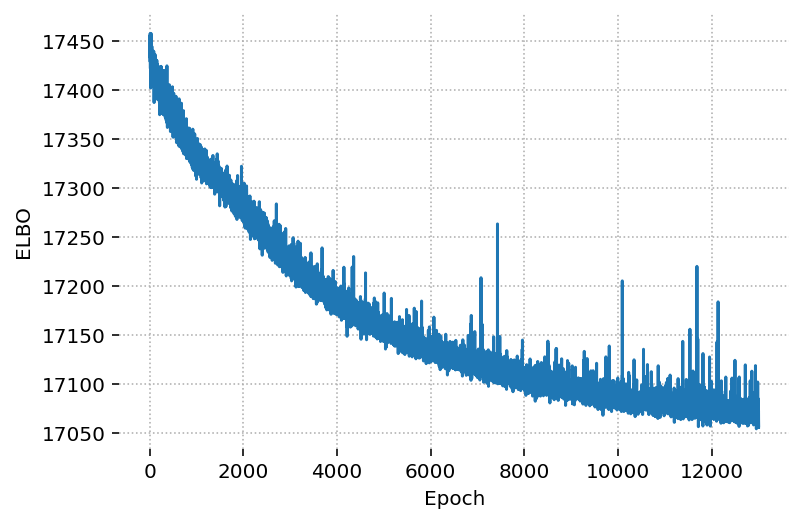

In [95]:
plt.plot(model.loss[2000:])
plt.xlabel('Epoch')
plt.ylabel('ELBO')
#plt.ylim((None, model.loss[2000]))

/Users/mg14/Downloads/desh-data/genomicsurveillance/misc/misc.py:782: RuntimeWarning: divide by zero encountered in log
  rax2 = ax[2].secondary_yaxis('right', functions=(lambda x: np.exp(x*model.tau), lambda x: np.log(x)/model.tau))


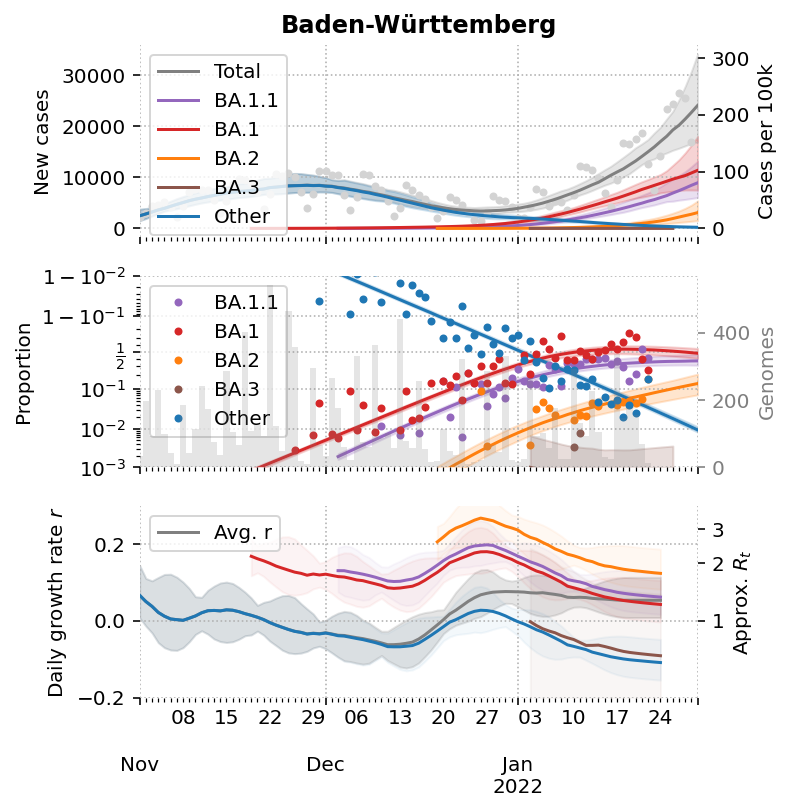

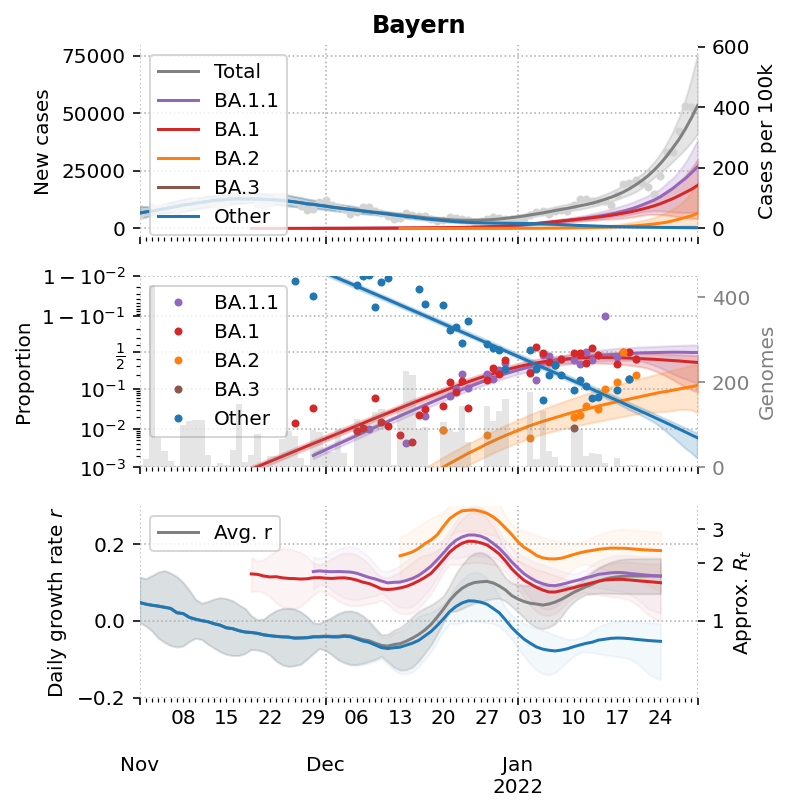

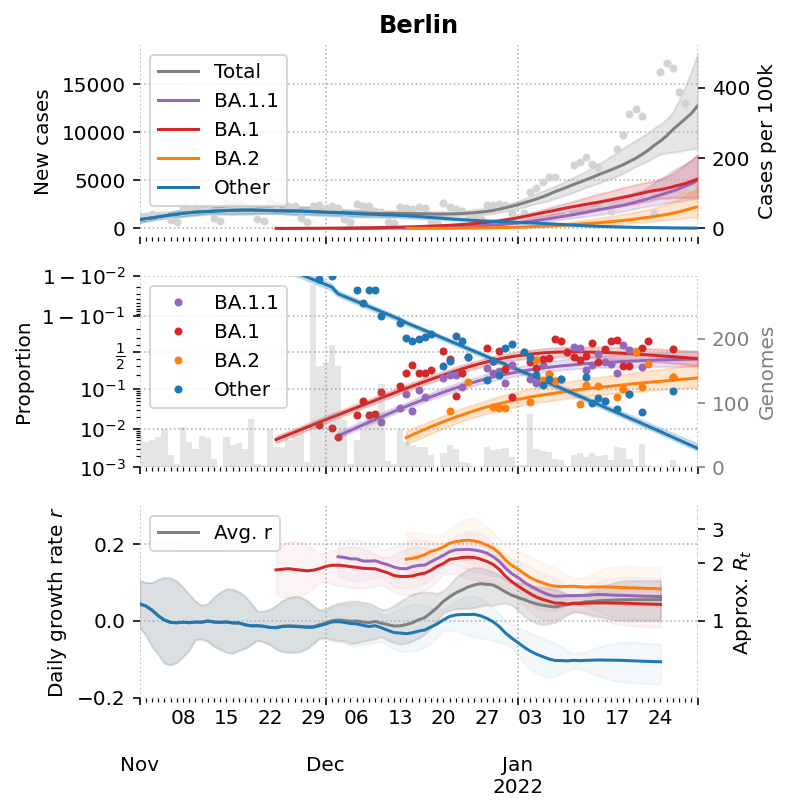

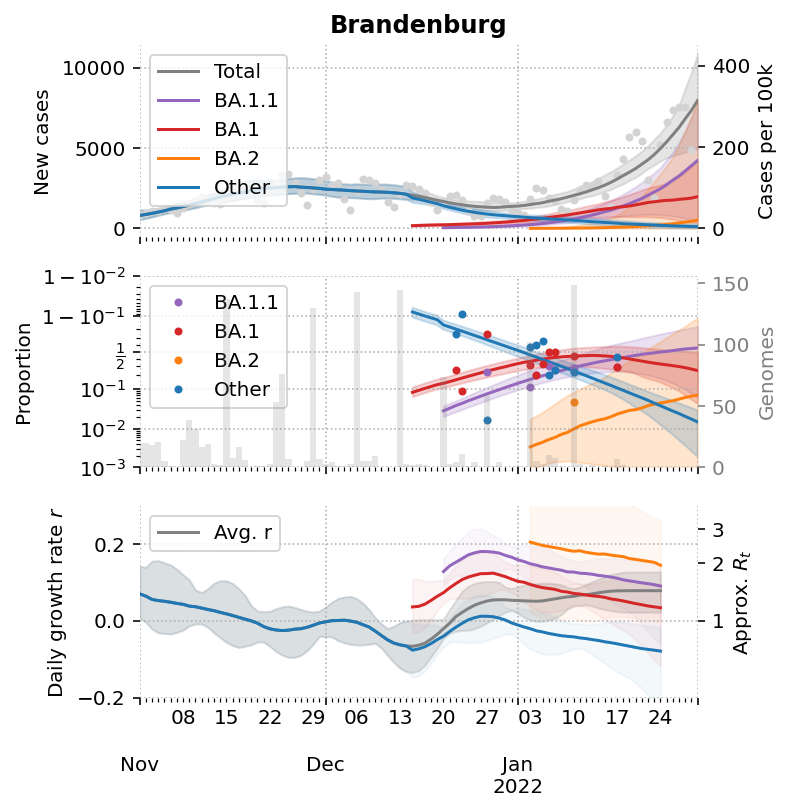

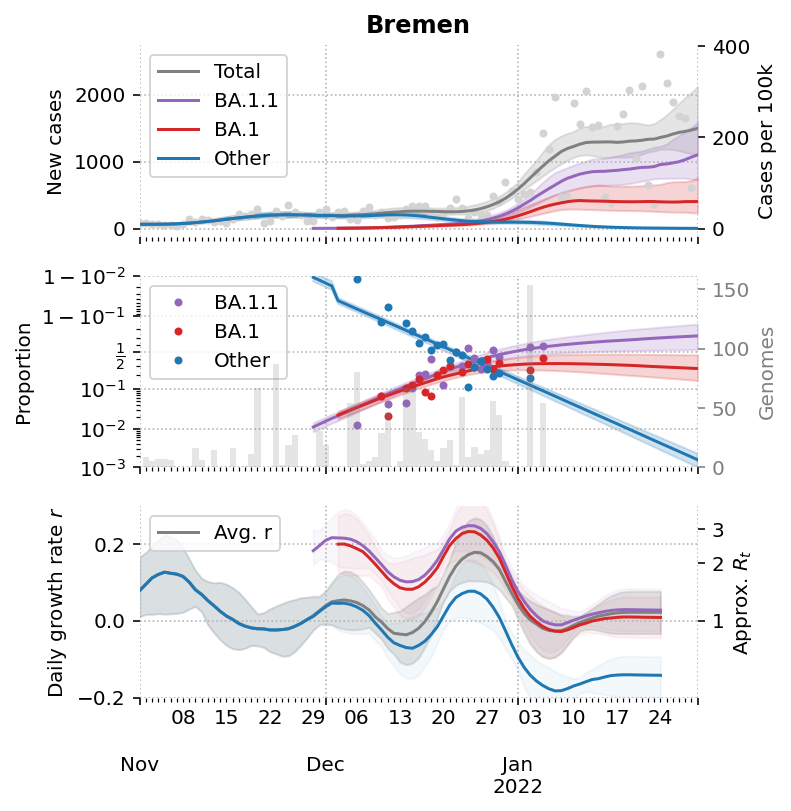

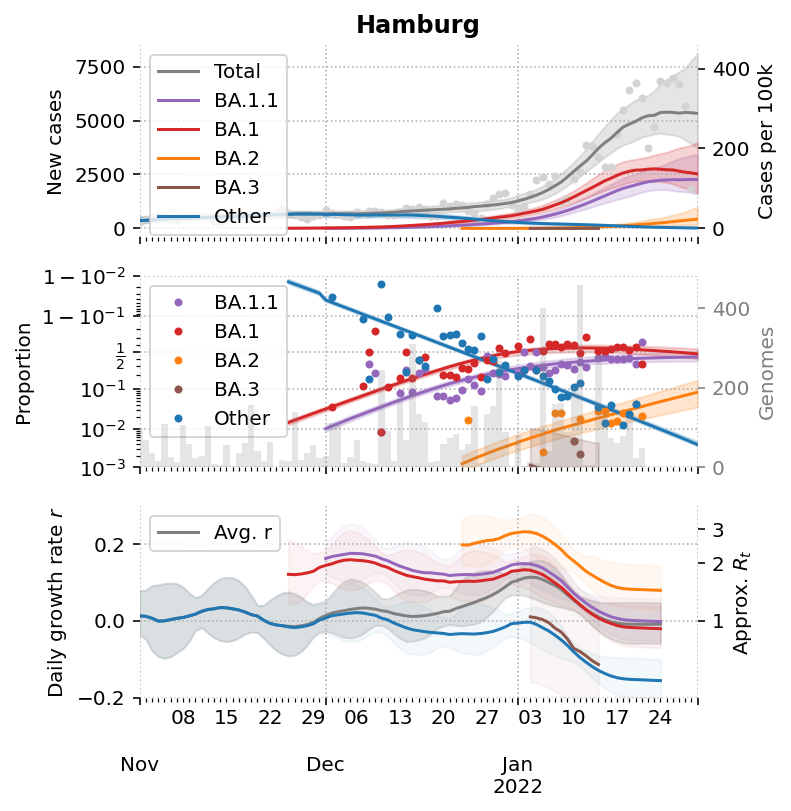

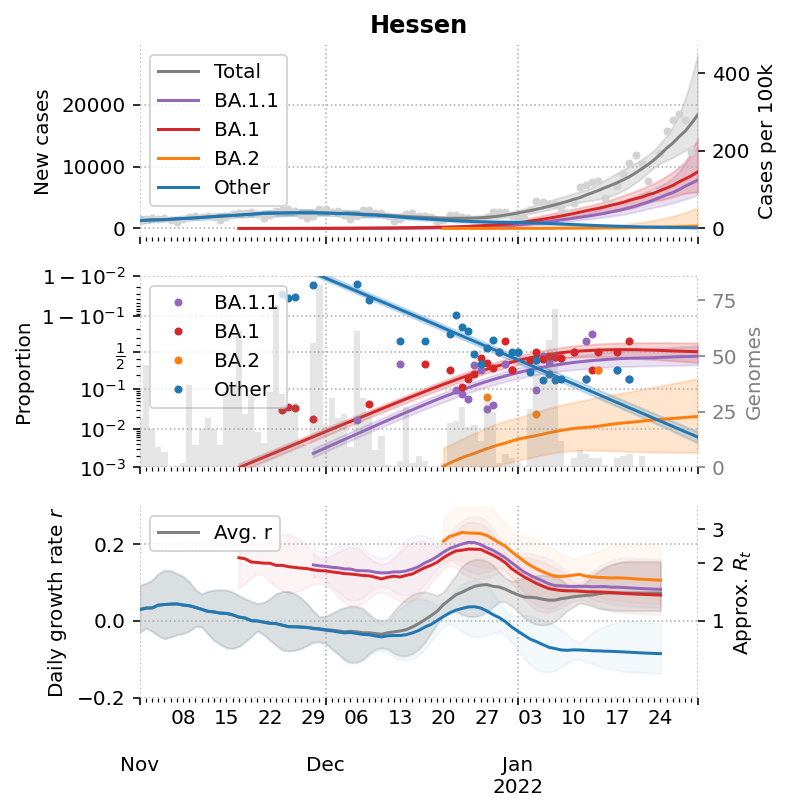

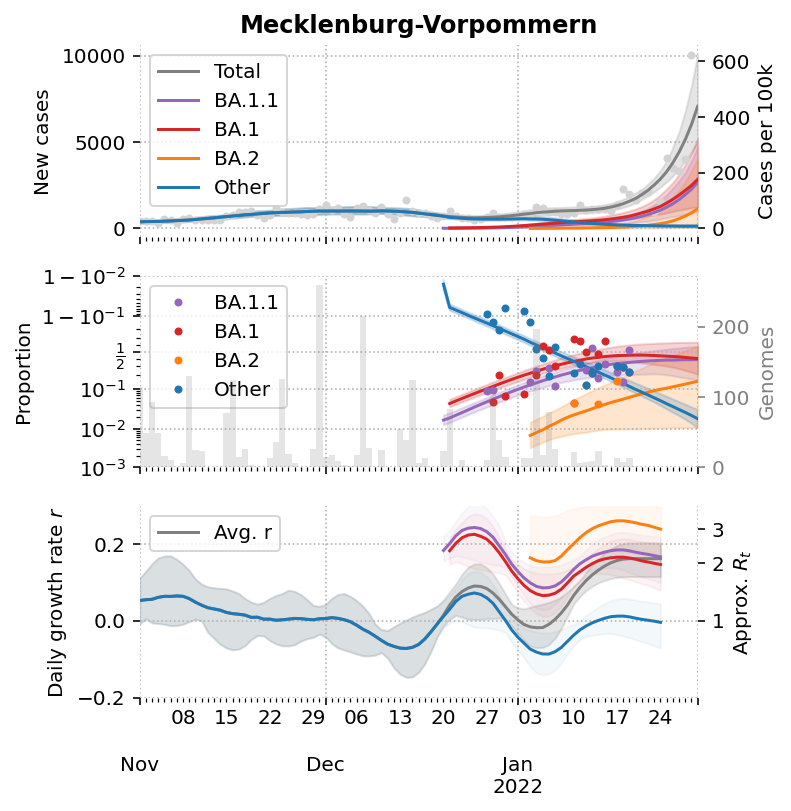

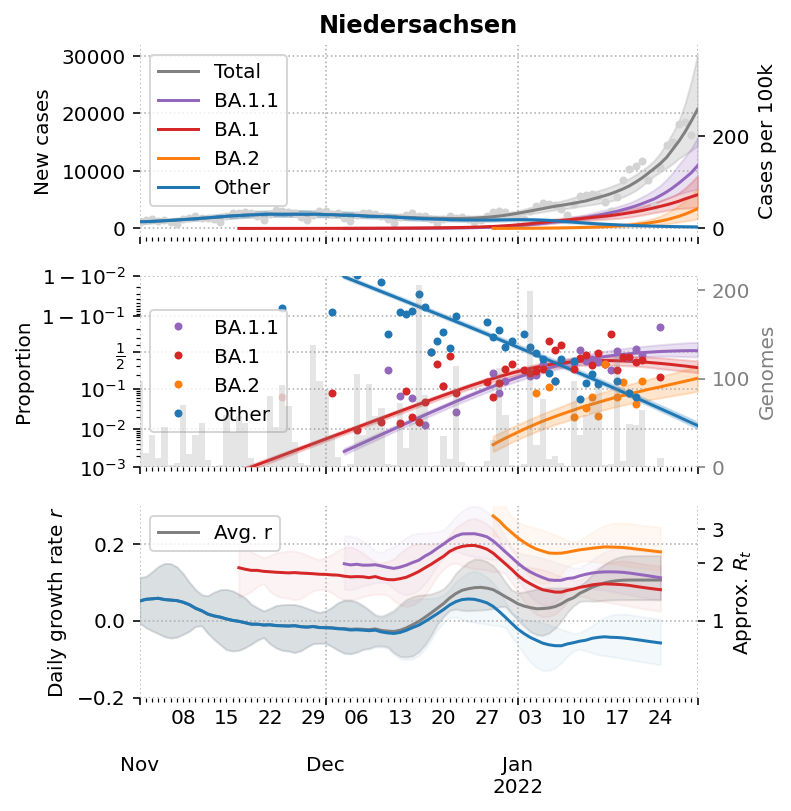

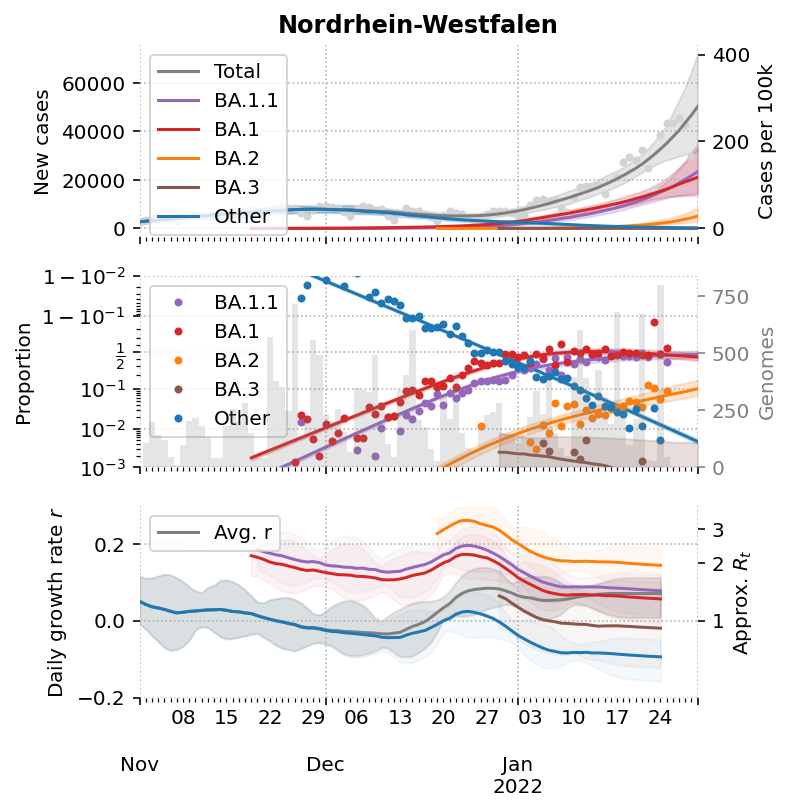

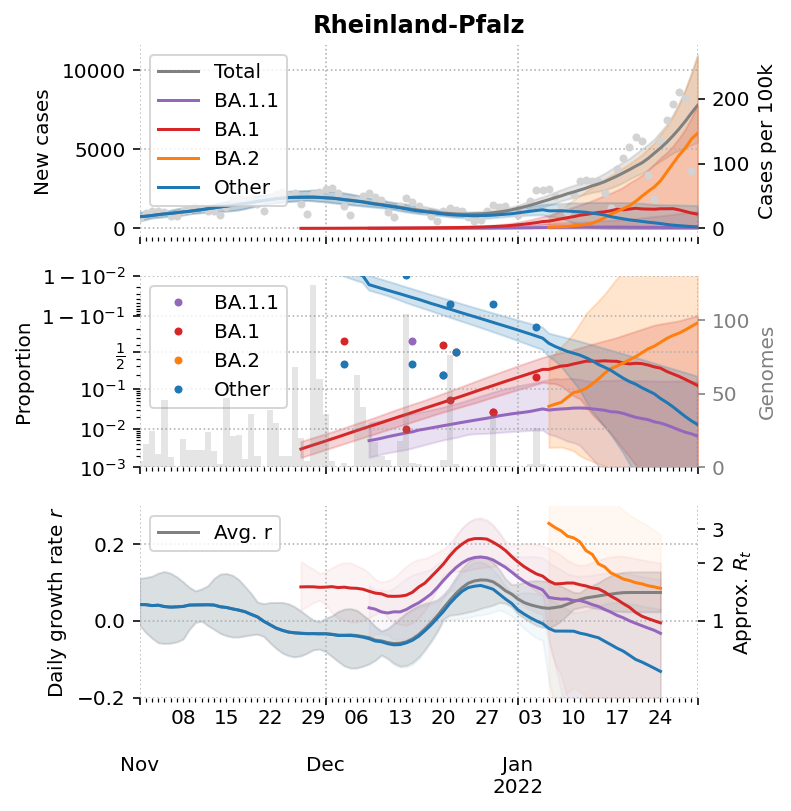

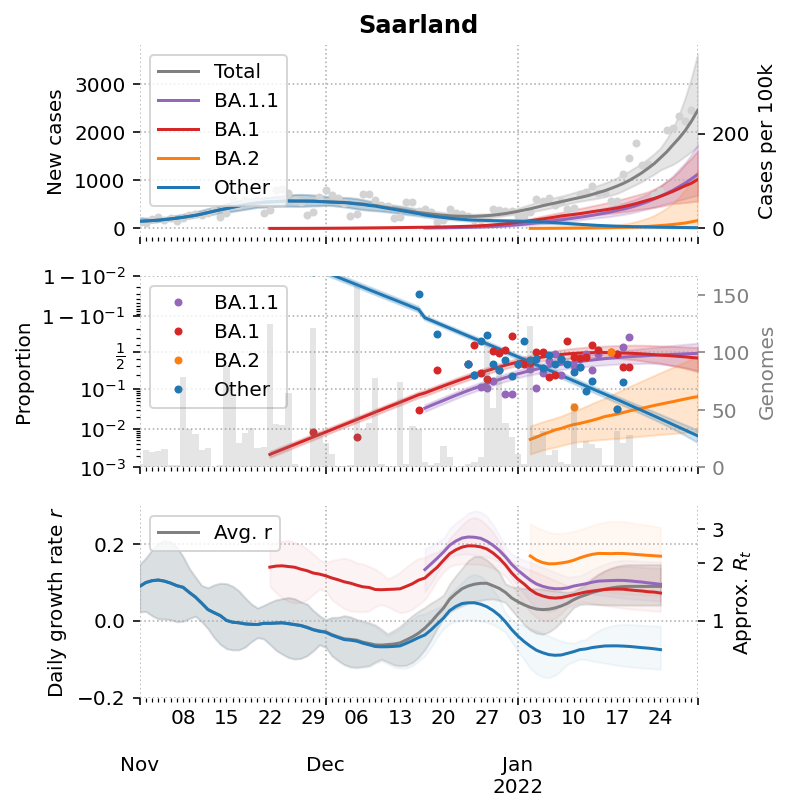

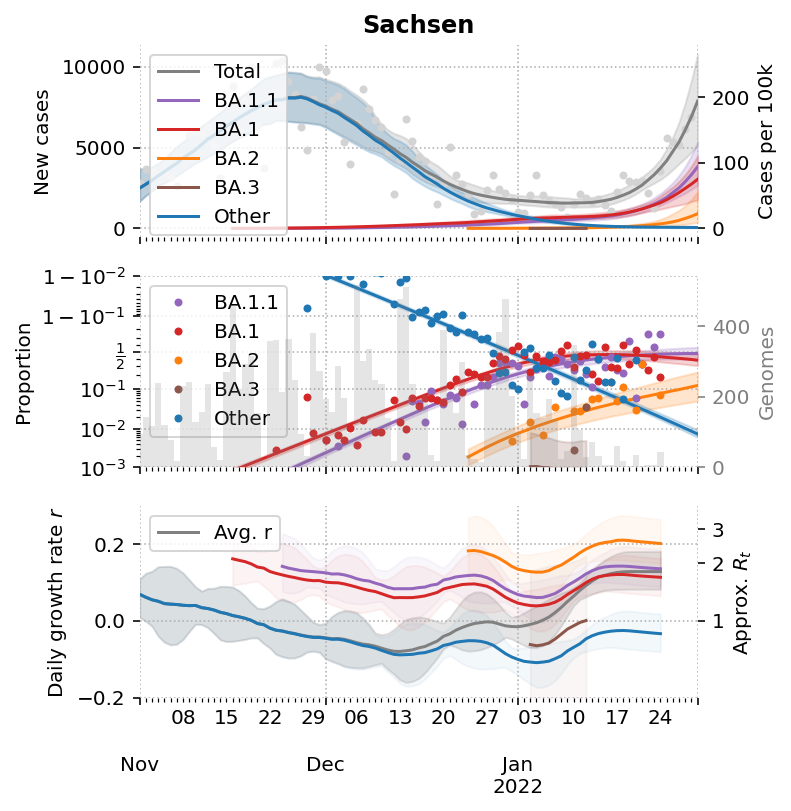

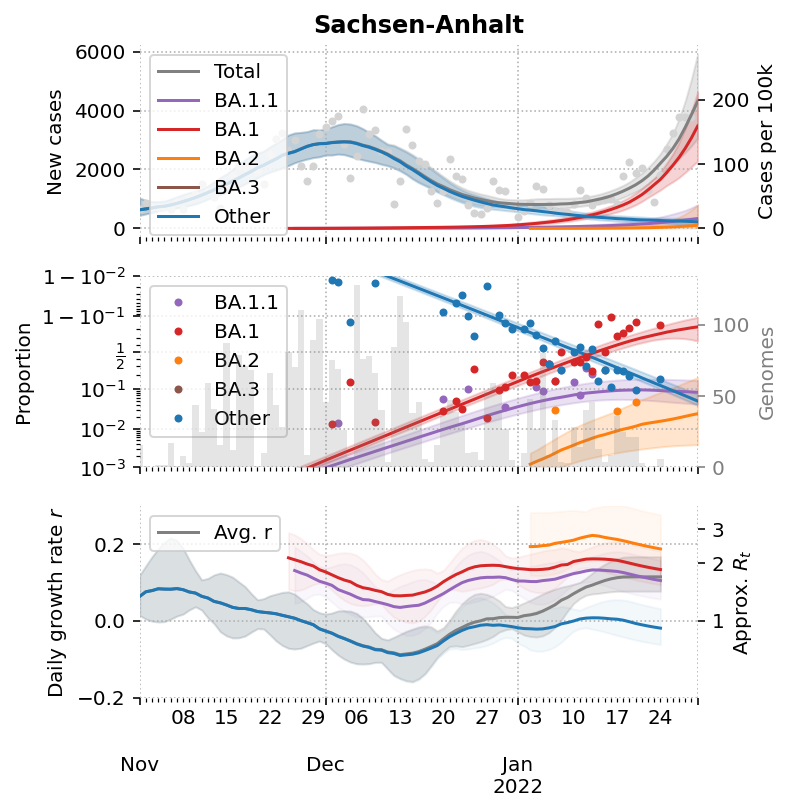

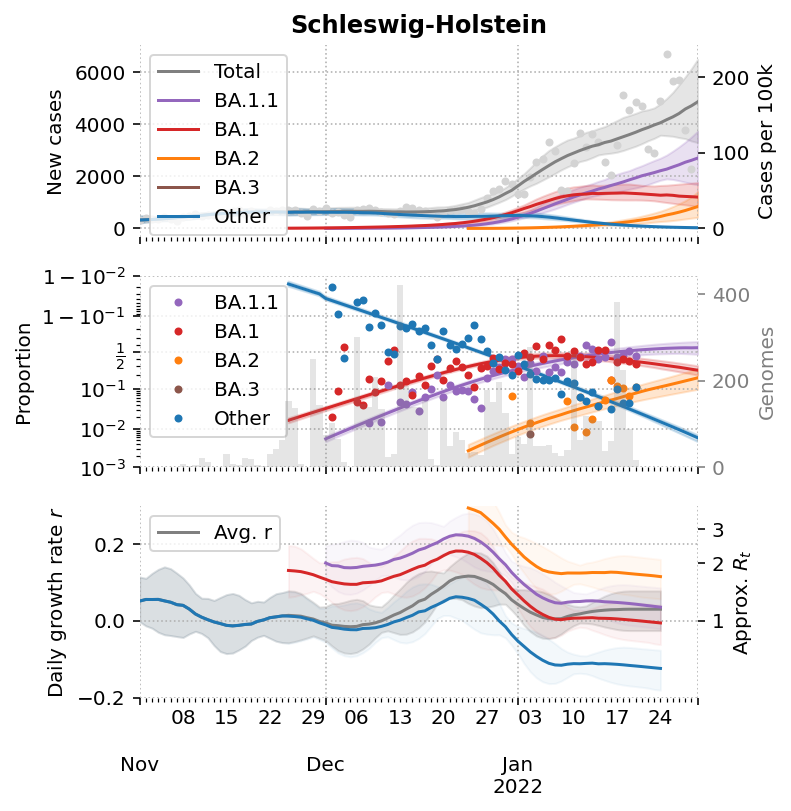

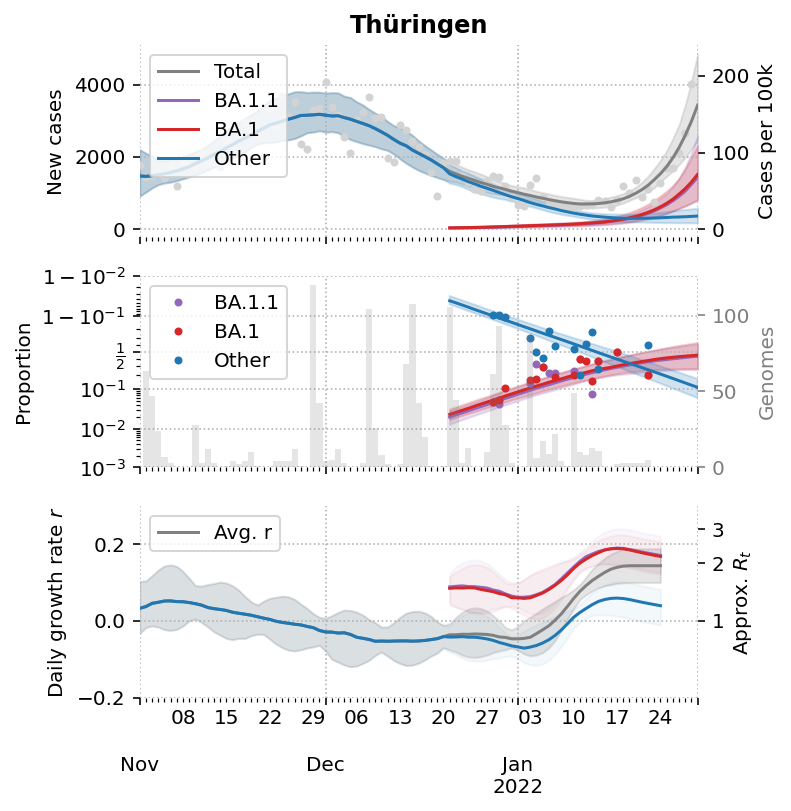

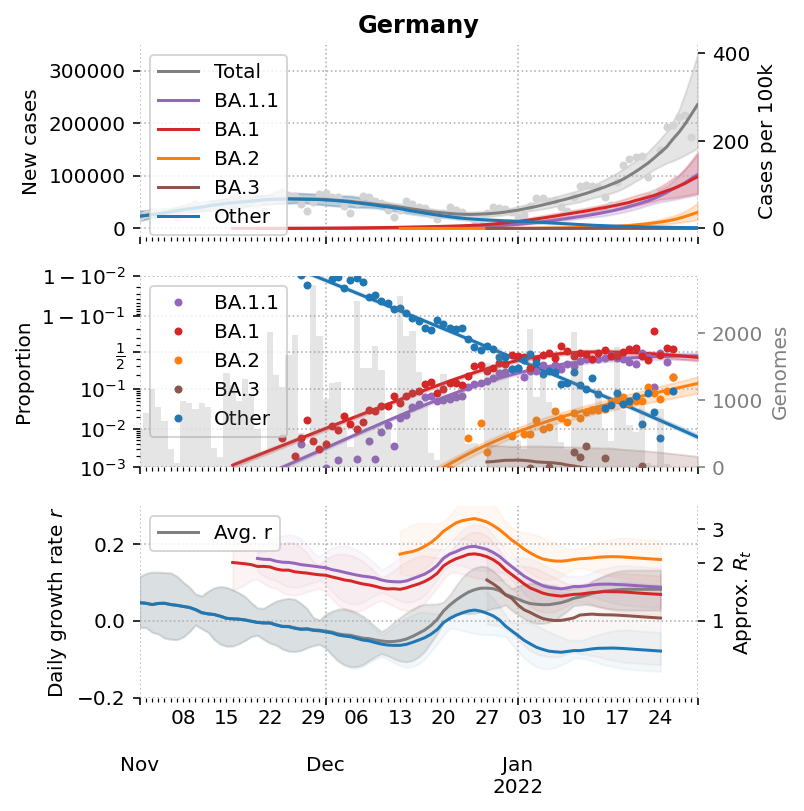

In [96]:
#from genomicsurveillance.plots.england import plot_lad, 
from genomicsurveillance.plots.england import plot_median_and_ci
for i,r in enumerate(cases_land.index.to_list() + ["Germany"]):
    w = np.where(GG[i].sum(0) >= 1)[0]
    plot_lad(model, i, CC, GG, seq_index, start_date="2021-11-01", show_start_date="2021-11-01",
        lin = w,
        labels = genomes.columns[w],
        lin_colors=np.array(['C4',"C3","C1", "C5" ,"C0", "C9","C0"])[w],#, "C6", "C1","C8"],
        #labels=[alias(y) if alias(y) != "AY.121" else "Orf3a:202L" for y in x],#["B.1.1.7", 'Delta', "AY.4", 'B.1.617.2.5', "B.1.177"],
        case_color="grey",
        case_markercolor="lightgrey",
            figsize=(5,6),
            prop_err=False)

    ax=plt.gcf().get_axes()
    
    ax[0].set_title(r, size=12, weight='bold')
    #ax[0].set_yscale('log')
    #ax[0].set_ylim((1,None))
   
    #ax[1].grid(which='both', ls=":")
    #ax[0].legend(loc='center left')
    #ax[2].set_ylim((-0.2,0.3))
    #ax[3].grid(False)
    
    #for a in ax:
        #a.xaxis.set_major_formatter(pd.plotting._matplotlib.converter.TimeSeries_DateFormatter("D"))
        #for s in a.spines:
        #    a.spines[s].set_visible(True)
    #fig = plt.gcf()
    #plt.tight_layout()
    ax[1].set_yscale("logit")
    ax[1].set_ylim((1e-3,1-1e-2))
    ax[2].set_ylim((-.2,.3))
    ax[2].legend(loc="upper left")

In [97]:
λ = model.get_lambda_lineage().mean(0) / model.population[:,np.newaxis, np.newaxis]

In [35]:
λ.shape

(17, 91, 4)

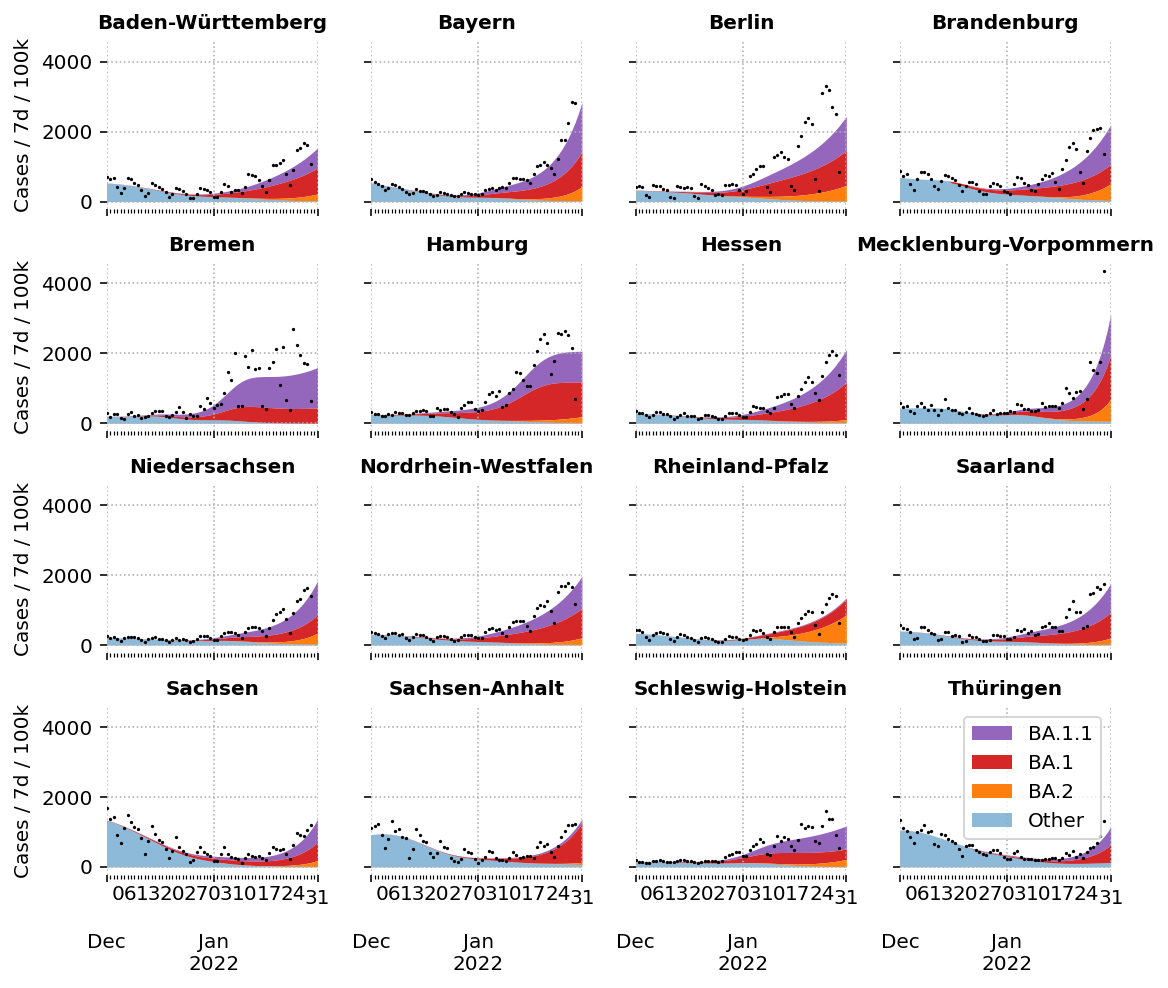

In [101]:
fig, ax = plt.subplots(4,4, figsize=(8,7), sharex=True, sharey=True)
ax = ax.flatten()
for i,r in enumerate(cases_land.index):
    y = pd.DataFrame(λ[i,:,:], columns=genomes.columns, index=cases_land.columns[1] + np.arange(λ.shape[1]).astype('timedelta64[D]')) #cases_land.loc[r].loc["2021-12-01":,'AnzahlFall'] / capita[r] * 1000 #* 700
    y = y[["Other","BA.2","BA.1","BA.1.1","BA.3"]].cumsum(1) * 1000 * 700
    #y.index.name = 'date'
    #x = prop_bl.loc[r,:,:][0].unstack()
    #z = x[0.5] * y
    y["BA.1"].plot(ax=ax[i], ls="", label="")
    (cases_land.loc[r]/capita[r]*1000 * 700).plot(ax=ax[i], marker=".", markersize=1.3, color="k", ls="", label="")
    ax[i].fill_between(y.index, y["BA.1"], y["BA.1.1"], color='C4', alpha=1, lw=0, label="BA.1.1")
    ax[i].fill_between(y.index, y["BA.2"], y["BA.1"], color='C3', alpha=1, lw=0, label="BA.1")
    ax[i].fill_between(y.index, y["Other"], y["BA.2"], color='C1', alpha=1, lw=0, label="BA.2")
    ax[i].fill_between(y.index, y["Other"], color='C0', alpha=.5, lw=0, label="Other")
    #ax[i].fill_between(z.index, y-x[0.95]*y, y-x[0.5]*y, color='none',alpha=1, lw=0, label="Omicron", hatch="//////", edgecolor="C3")
    ax[i].set_title(r, size=10 , weight='bold')
    ax[i].set_xlabel(None)
    ax[i].set_ylabel("Cases / 7d / 100k")
    ax[i].grid(ls=":")
    ax[i].set_xlim(("2021-12-01",None))
    for a in ax[i].spines.values():
        a.set_visible(False)
ax[-1].legend(title=None)
plt.tight_layout()
#fig.savefig("plots/omi_abs_by_area.png",dpi=200,bbox_inches='tight',pad_inches=0.2)

n  Growth rate r to ancestor      +/-   \
Lineage                                                
BA.1.1    18734                   0.126077  0.023770   
BA.1      26592                   0.107684  0.013133   
BA.2       1270                   0.210685  0.017628   
BA.3         34                   0.044086  0.035110   
Other    126864                   0.000000  0.000000   

         Growth rate r to baseline BA.1       +/-  
Lineage                                            
BA.1.1                         0.015798  0.023770  
BA.1                           0.000000  0.013133  
BA.2                           0.087175  0.017628  
BA.3                          -0.105469  0.035110  
Other                         -0.142412  0.000000

/Users/mg14/Downloads/desh-data/genomicsurveillance/misc/misc.py:852: RuntimeWarning: divide by zero encountered in log
  ax3 = plt.gca().secondary_yaxis('right', functions=(lambda x: np.exp(x*model.tau), lambda x: np.log(x)/model.tau))


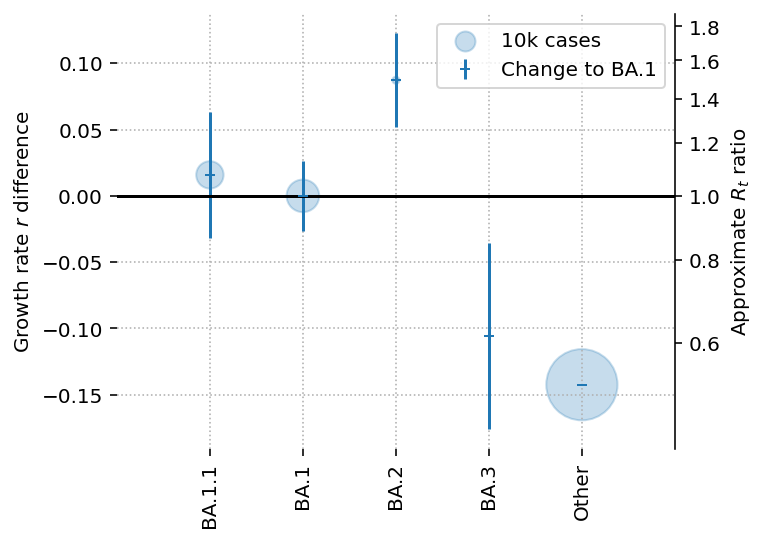

In [107]:
plt.figure(figsize=(5,4))
plot_growth_rates(model, genomes.columns.to_list(), color=["C0","None"], baseline="BA.1")

In [108]:
import geopandas as gpd

In [109]:
bl = gpd.read_file("data/bundeslaender.geojson").set_index("bundesland")

In [110]:
bl

land  \
bundesland                            
Baden-Württemberg       Deutschland   
Bayern                  Deutschland   
Berlin                  Deutschland   
Brandenburg             Deutschland   
Bremen                  Deutschland   
Hamburg                 Deutschland   
Hessen                  Deutschland   
Mecklenburg-Vorpommern  Deutschland   
Niedersachsen           Deutschland   
Nordrhein-Westfalen     Deutschland   
Rheinland-Pfalz         Deutschland   
Saarland                Deutschland   
Sachsen                 Deutschland   
Sachsen-Anhalt          Deutschland   
Schleswig-Holstein      Deutschland   
Thüringen               Deutschland   

                                                                 geometry  
bundesland                                                                 
Baden-Württemberg       MULTIPOLYGON (((7.63396 47.56122, 7.68592 47.5...  
Bayern                  MULTIPOLYGON (((9.63623 47.60202, 9.74582 47.6...  
Berlin                  POLYGON ((13.73143 52.41981, 13.73412 52.40198...  
Brandenburg             POLYGON ((14.03274 51.47500, 14.06259 51.44542...  
Bremen                  MULTIPOLYGON (((8.96595 53.05772, 8.98022 53.0...  
Hamburg                 MULTIPOLYGON (((10.21828 53.49923, 10.26573 53...  
Hessen                  MULTIPOLYGON (((8.90009 49.48187, 8.89974 49.5...  
Mecklenburg-Vorpommern  MULTIPOLYGON (((11.52874 54.07105, 11.51283 54...  
Niedersachsen           MULTIPOLYGON (((10.36397 51.55606, 10.36689 51...  
Nordrhein-Westfalen     MULTIPOLYGON (((6.16603 50.66186, 6.19337 50.6...  
Rheinland-Pfalz         POLYGON ((8.28766 48.99838, 8.23545 48.96749, ...  
Saarland                POLYGON ((7.31027 49.12958, 7.29356 49.11499, ...  
Sachsen                 POLYGON ((12.23908 50.24698, 12.26616 50.25888...  
Sachsen-Anhalt          POLYGON ((12.19559 51.14146, 12.24134 51.13061...  
Schleswig-Holstein      MULTIPOLYGON (((11.00454 54.45007, 11.01815 54...  
Thüringen               POLYGON ((10.59094 50.27180, 10.60497 50.29310...

In [111]:
genomes

lineage                       BA.1.1  BA.1  BA.2  BA.3  Other
bundesland        date                                       
Baden-Württemberg 2021-11-01       0     0     0     0     35
                  2021-11-02       0     0     0     0    197
                  2021-11-03       0     0     0     0     94
                  2021-11-04       0     0     0     0    230
                  2021-11-05       0     0     0     0     99
...                              ...   ...   ...   ...    ...
Thüringen         2022-01-22       1     1     0     0      3
                  2022-01-23       0     0     0     0      0
                  2022-01-24       0     0     0     0      0
                  2022-01-25       0     0     0     0      0
                  2022-01-26       0     0     0     0      0

[1392 rows x 5 columns]

In [112]:
λ.max()

0.0020164429990078606

In [113]:
de = bl.copy()
de.geometry = de.buffer(1e-2)
de = de.dissolve(by='land')

/Users/mg14/anaconda3/envs/npy/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


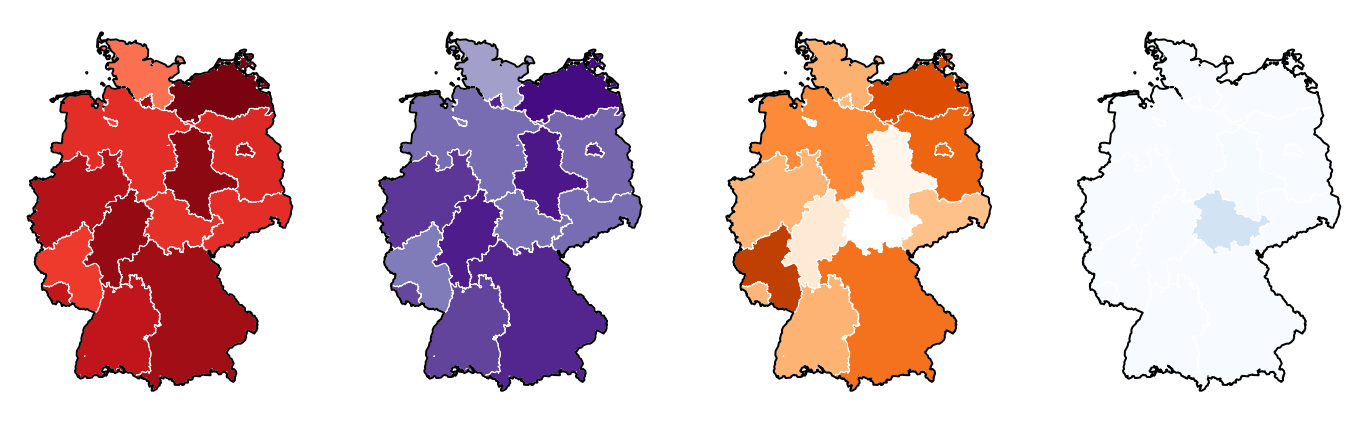

In [114]:
from matplotlib.colors import LogNorm
fig, axs = plt.subplots(1,4, figsize=(12,6))
for ax in axs:
    ax.axis("off")
#camera = Camera(fig)
vmax = λ[:-1,-1,:].max()
vmin = 1e-4
b0 = bl.copy().merge(pd.DataFrame(λ[:-1,-1,:], columns=genomes.columns, index=bl.index), 
                     left_index=True, right_index=True)
b0.plot("BA.1", ax=axs[0], cmap="Reds", norm=LogNorm(vmin=vmin, vmax=vmax))
b0.plot("BA.1", ax=axs[1], cmap="Purples", norm=LogNorm(vmin=vmin, vmax=vmax))
b0.plot("BA.2", ax=axs[2], cmap="Oranges",norm=LogNorm(vmin=vmin, vmax=vmax))
b0.plot("Other", ax=axs[3], cmap="Blues",norm=LogNorm(vmin=vmin, vmax=vmax))
for ax in axs:
    bl.boundary.plot(color='w',lw=0.5, ax=ax)
    de.boundary.plot(color='k',lw=1, ax=ax)

In [115]:
genomes.loc["Rheinland-Pfalz","2022-01-01":,:]

lineage                     BA.1.1  BA.1  BA.2  BA.3  Other
bundesland      date                                       
Rheinland-Pfalz 2022-01-01       0     0     0     0      0
                2022-01-02       0     0     0     0      0
                2022-01-03       0     2     0     0      0
                2022-01-04       0     5     0     0     22
                2022-01-05       0     0     0     0      2
                2022-01-06       0     0     0     0      0
                2022-01-07       0     0     0     0      0
                2022-01-08       0     0     0     0      1
                2022-01-09       0     0     0     0      0
                2022-01-10       0     1     0     0      0
                2022-01-11       0     0     0     0      0
                2022-01-12       0     0     0     0      1
                2022-01-13       0     0     1     0      0
                2022-01-14       0     1     0     0      0
                2022-01-15       0     0     0     0      0
                2022-01-16       0     0     0     0      0
                2022-01-17       0     0     0     0      0
                2022-01-18       0     0     0     0      0
                2022-01-19       0     0     0     0      0
                2022-01-20       0     0     0     0      0
                2022-01-21       0     0     0     0      0
                2022-01-22       0     0     0     0      0
                2022-01-23       0     0     0     0      0
                2022-01-24       0     0     0     0      0
                2022-01-25       0     0     0     0      0
                2022-01-26       0     0     0     0      0

In [116]:
capita.values @ λ[:-1,-1,:]

array([103657.00267258,  93567.99171471,  33828.39373456,   2451.61090274,
         2537.43408102])

In [117]:
(lambda x: x/x.sum(1, keepdims=True))(λ[:,-1,:])

array([[3.73842094e-01, 4.83283873e-01, 1.33117836e-01, 3.30964237e-04,
        9.42523237e-03],
       [4.77723939e-01, 3.35254227e-01, 1.39716323e-01, 4.15601022e-02,
        5.74540875e-03],
       [4.01464060e-01, 4.07470469e-01, 1.87871681e-01, 0.00000000e+00,
        3.19378948e-03],
       [5.16355308e-01, 2.52204762e-01, 2.16802558e-01, 0.00000000e+00,
        1.46373722e-02],
       [7.22478992e-01, 2.75944111e-01, 0.00000000e+00, 0.00000000e+00,
        1.57689784e-03],
       [4.28577408e-01, 4.78027912e-01, 8.83935204e-02, 1.05578645e-03,
        3.94537308e-03],
       [4.44808166e-01, 5.04272585e-01, 4.48851588e-02, 0.00000000e+00,
        6.03409002e-03],
       [3.73161598e-01, 4.05635770e-01, 2.02118520e-01, 0.00000000e+00,
        1.90841114e-02],
       [5.25826950e-01, 2.85654231e-01, 1.76409820e-01, 0.00000000e+00,
        1.21089989e-02],
       [4.64662618e-01, 4.26984320e-01, 1.02916846e-01, 7.25359139e-04,
        4.71085669e-03],
       [2.41412714e-02, 3.3769

In [118]:
from celluloid import Camera
from tqdm import tqdm
from matplotlib import colors


In [ ]:
n = 7
m = (int(λ.shape[1]/7)+1)
fig, axs = plt.subplots(m,n, figsize=(7,10*m/n))
#camera = Camera(fig)
b0 = bl.copy().simplify(1e-1)
axs = axs.flatten()
for ax in axs:
    ax.axis("off")

    
def make_rgb_transparent(rgb, bg_rgb, alpha):
    return [alpha * c1 + (1 - alpha) * c2 for (c1, c2) in zip(rgb, bg_rgb)]
r = colors.colorConverter.to_rgb("C3")
b = colors.colorConverter.to_rgb("C0")
y = colors.colorConverter.to_rgb("C1")

for i in tqdm(range(λ.shape[1])): #λ.shape[1])
    ax = axs[i]
        
    #alpha = np.minimum(1, λ[:-1,i,[1,4]] * 700) #/λ.max()

    alpha = λ[:-1,i,[1,2,4]]/λ.max()
    c = [make_rgb_transparent(y, make_rgb_transparent(r, make_rgb_transparent(b, (1,1,1), x[2]), x[0]), x[1]) for x in alpha]

    ax.set_title((cases_land.columns[0] + np.timedelta64(i,"D")).strftime("%-d %b \'%y"), size=8)
    b0.plot(color=c, ax=ax)

    #bl.boundary.plot(color='w',lw=0.5, ax=ax)
    #de.boundary.plot(color='k',lw=1, ax=ax)
    #camera.snap()


In [ ]:
f"{λ[:-1,-1,1] @ capita.values:0.0f}"

In [ ]:
λ.max()*700

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,10.5), facecolor=None)
camera = Camera(fig)
b0 = bl.copy()#.simplify(1e-2)

ax.axis("off")

for i in tqdm(range(λ.shape[1])): #λ.shape[1])
    
    #alpha = np.minimum(1, λ[:-1,i,[1,4]] * 700) #/λ.max()
    alpha = λ[:-1,i,[1,2,4]]/λ.max()
    c = [make_rgb_transparent(y, make_rgb_transparent(r, make_rgb_transparent(b, (1,1,1), x[2]), x[0]), x[1]) for x in alpha]
    b0.plot(color=c, ax=ax)

    #ax.set_title(cases_land.columns[i].strftime("%-d %b \'%y"), size=12)
    if i == 0:
        ax.set_ylim((None, ax.get_ylim()[0] + 1.05 * (ax.get_ylim()[1]-ax.get_ylim()[0])))
    
    ax.text(0.0, 1.01,  (cases_land.columns[0] + np.timedelta64(i,"D")).strftime("%-d %b \'%y"), size=24, transform=ax.transAxes)
    ax.text(0.6, 1.01,  f"{λ[:-1,i,4] @ capita.values:0.0f}", color = "C0", size=24, transform=ax.transAxes, ha = 'right')
    ax.text(0.6, 0.96,  f"{λ[:-1,i,1] @ capita.values:0.0f}", color = "C3", size=24, transform=ax.transAxes, ha= 'right')
    ax.text(0.6, 0.91,  f"{λ[:-1,i,2] @ capita.values:0.0f}", color = "C1", size=24, transform=ax.transAxes, ha = 'right')
    ax.text(0.6, 1.01,  f" Delta cases", color = "C0", size=24, transform=ax.transAxes)
    ax.text(0.6, 0.96,  f" BA.1 cases", color = "C3", size=24, transform=ax.transAxes)
    ax.text(0.6, 0.91,  f" BA.2 cases", color = "C1", size=24, transform=ax.transAxes)

    bl.boundary.plot(color='w',lw=1, ax=ax)
    de.boundary.plot(color='k',lw=2, ax=ax)
    camera.snap()


In [ ]:
animation = camera.animate(interval = 100, blit=True, repeat = False, repeat_delay=1000)

In [ ]:
#import ffmpeg
from IPython.display import HTML
import re
HTML(re.sub("width=\"576\"","width=288",animation.to_html5_video()))

# UK analysis

In [119]:
import requests
cases_uk = pd.read_csv("https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDate&format=csv", parse_dates=True, index_col=3)["newCasesBySpecimenDate"].sort_index().loc["2021-11-01":].iloc[:-1]

In [120]:
cases_uk

date
2021-11-01     44204
2021-11-02     37274
2021-11-03     35351
2021-11-04     33069
2021-11-05     29716
               ...  
2022-01-22     70907
2022-01-23     87967
2022-01-24    109830
2022-01-25     97882
2022-01-26     93379
Name: newCasesBySpecimenDate, Length: 87, dtype: int64

In [127]:
x = []
c = "United Kingdom"
for v in ['BA.1','BA.1.1', 'BA.2', 'BA.3', 'B.1.617.2*']:
    r = requests.get(f"https://lapis.cov-spectrum.org/gisaid/v1/sample/aggregated?fields=date&host=Human&country={c}&dateFrom=2021-11-01&dateTo={np.datetime64('today')}&pangoLineage={v}") #&dataVersion=1642092398
    d = pd.DataFrame(r.json()['data'])
    x.append(pd.DataFrame({v: d['count'].values}, index=pd.DatetimeIndex(d.date)).sort_index()[v])

genomes_uk = pd.DataFrame(x).T.fillna(0)#
genomes_uk = genomes_uk.loc[genomes_uk.index <= cases_uk.index.max(),:]
genomes_uk.sum(0)

BA.1          229743.0
BA.1.1         55599.0
BA.2            1913.0
BA.3               9.0
B.1.617.2*    363928.0
dtype: float64

In [158]:
genomes_uk["BA.1"][:"2021-11-18"] = 0
genomes_uk["BA.1.1"][:"2021-11-18"] = 0
genomes_uk["BA.2"][:"2021-12-18"] = 0

In [159]:
d = np.datetime64("2021-12-14") + np.arange(0,6,2).astype("timedelta64[W]")#[np.datetime64("2021-12-12"), np.datetime64("2021-12-31")]
#bar[1,genomes_uk.index > d[1],:] = 0
#bar[2,genomes_uk.index <= d[1],:] = 0

In [168]:
foo = np.stack((len(d)+1) * [cases_uk["2021-11-01":].values], axis=0)
bar = np.stack((len(d)+1)  * [genomes_uk.values], axis=0)
for i, dd in enumerate(d):
    bar[i,genomes_uk.index > dd,:] = 0
    bar[i+1,genomes_uk.index <= dd,:] = 0


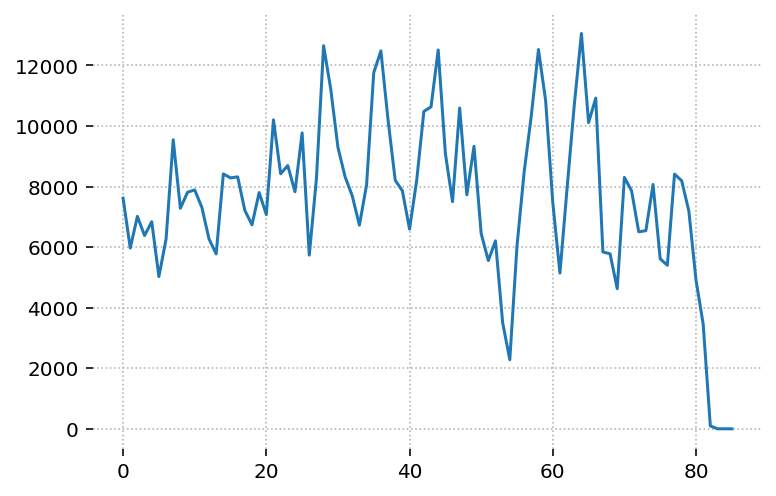

In [184]:
plt.plot(bar.sum((0,2)))

In [171]:
model_uk = MultiLineageTimeShift(
    foo, #cases_uk["2021-11-01":].values.reshape(1,-1),
    bar,    
    np.array([cases_uk.index.to_list().index(i) for i in genomes_uk.index]),
    np.repeat(67.22e6,len(d)+1),
    #auto_correlation=0.5,
    #linearize=True,
    arma = arma2,
    b_scale=0.05,
    b0_scale=0.5,
    c_scale=5,
    beta_scale= np.append(10.,np.repeat(10., B0.shape[2]-1)),# np.concatenate([np.repeat(1., knots.num_long_basis), np.repeat(.1, knots.num_short_basis)]),
    tau=4.6,
    basis=B0, #knots.basis,
    shift=7,  
    alpha0=.01,
    alpha1=10000., 
    week=True,
    #model_kwargs={'handler':'SVI', 'loss':Trace_ELBO(num_particles=5), 'num_epochs':10000, 'lr':0.001, 'num_samples': 100}
    model_kwargs={'handler':'SVI', 'loss':Trace_ELBO(num_particles=10), 'num_epochs':10000, 'lr':0.005, 'lrd': 0.5 ** (1/10000), 'num_samples': 100}

)

In [172]:
model_uk.fit()

SVI step 0 / 10,000 | 0 %
SVI step 1,000 / 10,000 | 10 %
SVI step 2,000 / 10,000 | 20 %
SVI step 3,000 / 10,000 | 30 %
SVI step 4,000 / 10,000 | 40 %
SVI step 5,000 / 10,000 | 50 %
SVI step 6,000 / 10,000 | 60 %
SVI step 7,000 / 10,000 | 70 %
SVI step 8,000 / 10,000 | 80 %
SVI step 9,000 / 10,000 | 90 %


Text(0, 0.5, 'ELBO')

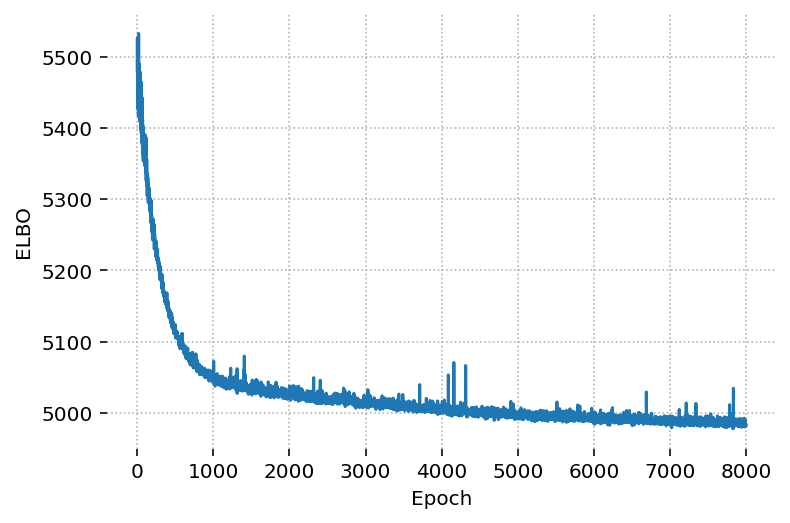

In [173]:
plt.plot(model_uk.loss[2000:])
plt.xlabel('Epoch')
plt.ylabel('ELBO')

In [208]:
import importlib
importlib.reload(gs.misc.misc)
importlib.reload(gs.misc)
from genomicsurveillance.misc import MultiLineageTimeShift, plot_lad, plot_growth_rates, get_transmissibility

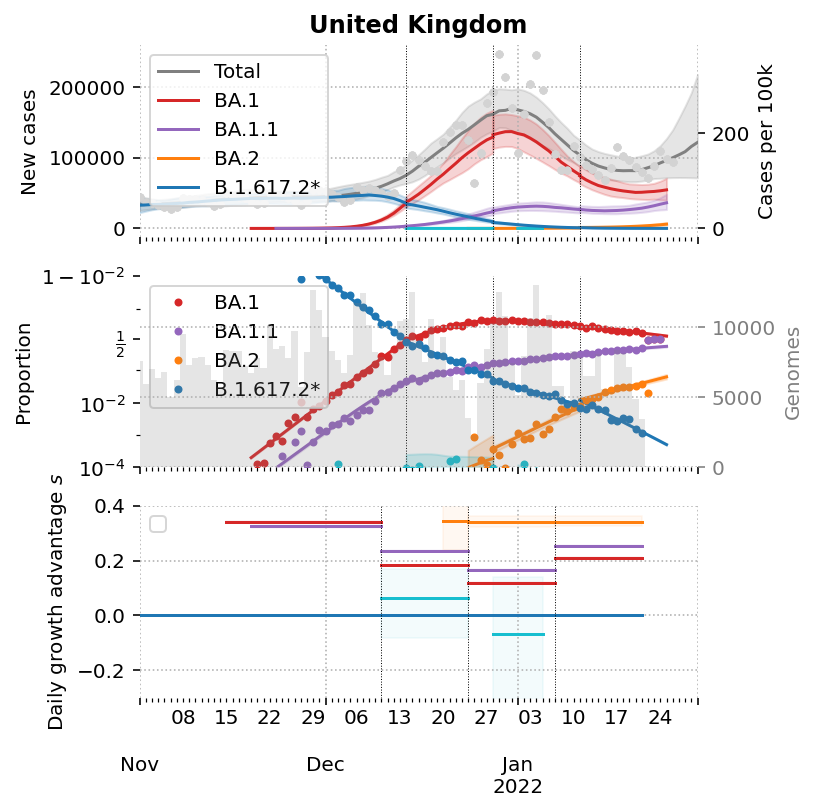

In [209]:
for i in range(bar.shape[0]-1,-1, -1):
    w = np.arange(genomes_uk.shape[1]) #if i == 2 else [0,2]
    plot_lad(model_uk, i, 
             model_uk.cases, model_uk.lineages, np.array([cases_uk.index.to_list().index(i) for i in genomes_uk.index]), 
             start_date="2021-11-01", 
             show_start_date="2021-11-01",
            lin = w,
            labels = genomes_uk.columns[w],
            lin_colors=np.array(['C3','C4', "C1" ,"C9", "C0","C0"])[w],#, "C6", "C1","C8"],
            #labels=[alias(y) if alias(y) != "AY.121" else "Orf3a:202L" for y in x],#["B.1.1.7", 'Delta', "AY.4", 'B.1.617.2.5', "B.1.177"],
            case_color="grey",
            case_markercolor="lightgrey",
                figsize=(5,6),
                prop_err=False,
            clip_to_lineage_data = True,
             add = True if i < bar.shape[0]-1 else False,
            bleed_left = 1,
             bleed_right=1,
             show_Rt = False,
             plot_s= True
            )

ax=plt.gcf().get_axes()
    
ax[0].set_title("United Kingdom", size=12, weight='bold')

ax[1].set_yscale("logit")
ax[1].set_ylim((1e-4,1-1e-2))
ax[2].set_ylim((-.3,.4))
ax[2].legend(loc="upper left")
ax[3].grid("off")
for i,a in enumerate(ax[:-1]):
    for dd in d:
        x = dd 
        if i ==2:
            x -= np.timedelta64(int(model.tau), "D")
        a.axvline(x, ls=":", color='k', lw=0.5)


In [195]:
model_uk.get_log_R().shape

(100, 4, 91, 1)

In [136]:
get_transmissibility(model_uk)

array([[ 0.33181513,  0.29577296,  0.16918285, -0.16672782,  0.        ],
       [ 0.17900283,  0.23726255,  0.31541234,  0.03575793,  0.        ],
       [ 0.12054036,  0.16774879,  0.31537306, -0.16678566,  0.        ]])

In [137]:
import importlib
importlib.reload(gs.misc.misc)
importlib.reload(gs.misc)
from genomicsurveillance.misc import MultiLineageTimeShift, plot_lad, plot_growth_rates

n  Growth rate r to ancestor      +/-   \
Lineage                                                   
BA.1        229737                   0.041905  0.080771   
BA.1.1       55599                   0.037781  0.057082   
BA.2          1911                   0.154543  0.009069   
BA.3             9                  -0.006754  0.097014   
B.1.617.2*  363928                   0.000000  0.000000   

            Growth rate r to baseline BA.1       +/-  
Lineage                                               
BA.1                              0.000000  0.080771  
BA.1.1                            0.031299  0.057082  
BA.2                              0.129496  0.009069  
BA.3                             -0.254834  0.097014  
B.1.617.2*                       -0.212894  0.000000

/Users/mg14/Downloads/desh-data/genomicsurveillance/misc/misc.py:852: RuntimeWarning: divide by zero encountered in log
  ax3 = plt.gca().secondary_yaxis('right', functions=(lambda x: np.exp(x*model.tau), lambda x: np.log(x)/model.tau))


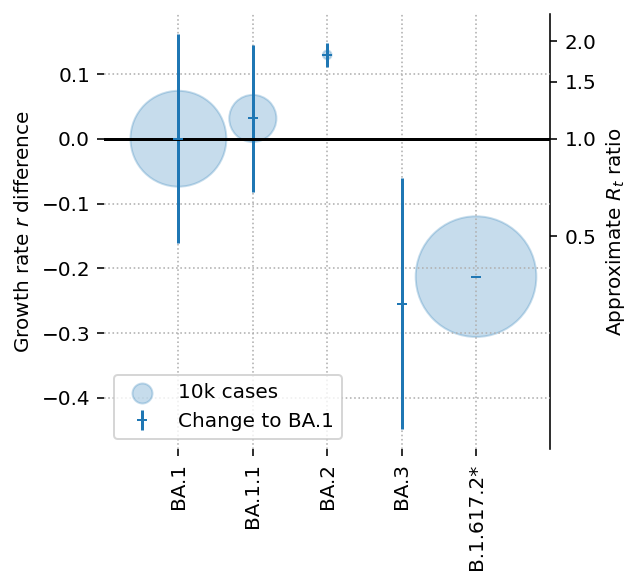

In [190]:
plt.figure(figsize=(4,4))
plot_growth_rates(model_uk, genomes_uk.columns.to_list(), color=["C0","None"], baseline="BA.1")
